In [321]:
#Question 1 - who wrote the disputed essays, Hamilton or Madison?

In [322]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score

In [323]:
data=pd.read_csv("HW4-data-fedPapers85.csv")
data.head(25)

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.000
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.000
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.000
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.000
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.000
5,dispt,dispt_fed_54.txt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,...,0.007,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.000
6,dispt,dispt_fed_55.txt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,...,0.015,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.000
7,dispt,dispt_fed_56.txt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,...,0.018,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.000
8,dispt,dispt_fed_57.txt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,...,0.027,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.000
9,dispt,dispt_fed_62.txt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,...,0.000,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.000


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    85 non-null     object 
 1   filename  85 non-null     object 
 2   a         85 non-null     float64
 3   all       85 non-null     float64
 4   also      85 non-null     float64
 5   an        85 non-null     float64
 6   and       85 non-null     float64
 7   any       85 non-null     float64
 8   are       85 non-null     float64
 9   as        85 non-null     float64
 10  at        85 non-null     float64
 11  be        85 non-null     float64
 12  been      85 non-null     float64
 13  but       85 non-null     float64
 14  by        85 non-null     float64
 15  can       85 non-null     float64
 16  do        85 non-null     float64
 17  down      85 non-null     float64
 18  even      85 non-null     float64
 19  every     85 non-null     float64
 20  for       85 non-null     float64


In [325]:
data['author'].value_counts()

Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: author, dtype: int64

array([<AxesSubplot: ylabel='author'>], dtype=object)

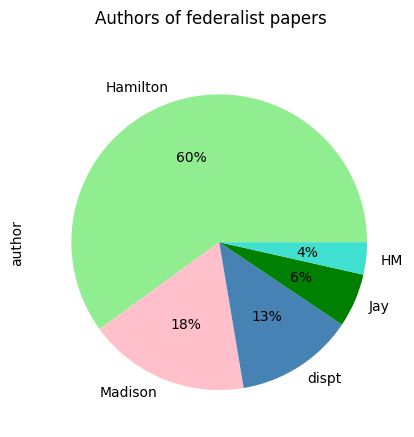

In [326]:
data['author'].value_counts().plot(kind='pie',subplots=True,autopct='%1.0f%%',
                                colors = ['lightgreen', 'pink', 'steelblue','green','turquoise'],
                                title='Authors of federalist papers')

In [327]:
def get_stats(word):
    return {'min':word.min(),'max':word.max(),'count':word.count(),'mean':word.mean()}

do_stats=get_stats(data['do'])
print("do :",do_stats)
can_stats=get_stats(data['can'])
print("can :",can_stats)
into_stats=get_stats(data['into'])
print("into :",into_stats)

do : {'min': 0.0, 'max': 0.028, 'count': 85, 'mean': 0.0062588235294117655}
can : {'min': 0.0, 'max': 0.11, 'count': 85, 'mean': 0.0355764705882353}
into : {'min': 0.0, 'max': 0.105, 'count': 85, 'mean': 0.024094117647058825}


In [328]:
def get_stats(word):
    return {'min':word.min(),'max':word.max(),'count':word.count(),'mean':word.mean()}

authors_group = data.groupby('author').agg('mean')
authors_group.loc[:,['do','into','upon']]

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_4565/3132123974.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  authors_group = data.groupby('author').agg('mean')


,do,into,upon
author,,,
HM,0.002333,0.029667,0.005333
Hamilton,0.006608,0.021314,0.047314
Jay,0.008200,0.044600,0.001800
Madison,0.004000,0.026867,0.002200
dispt,0.007909,0.022364,0.001182


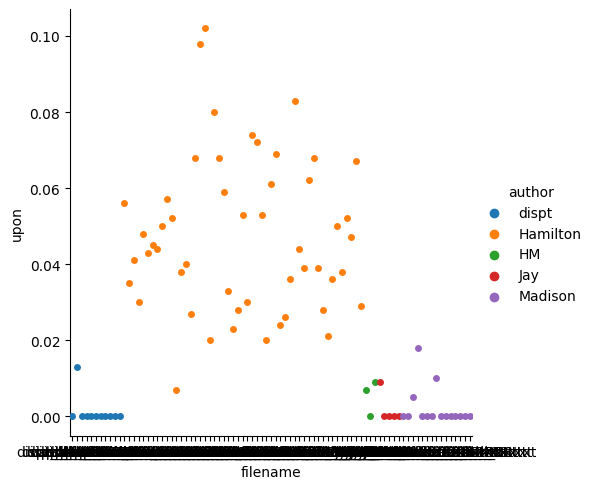

In [329]:
#scatterplot according to authors
sns.catplot(data=data, x="filename", y="upon",hue='author', jitter=False)

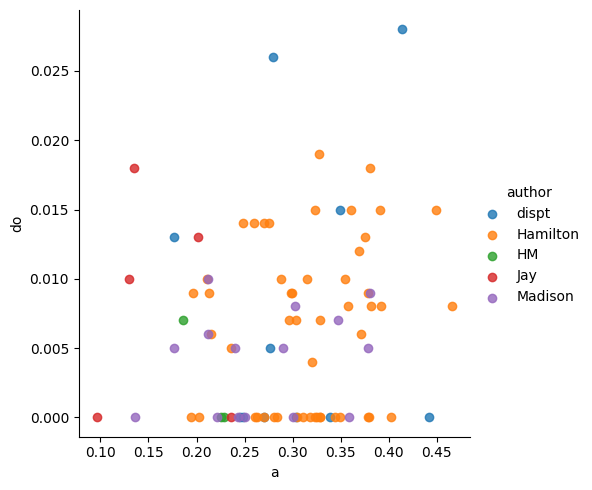

In [330]:
#scatterplot before
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import seaborn as sns
sns.lmplot(x='a', y='do', data=data, hue='author', fit_reg=False)

plt.show()

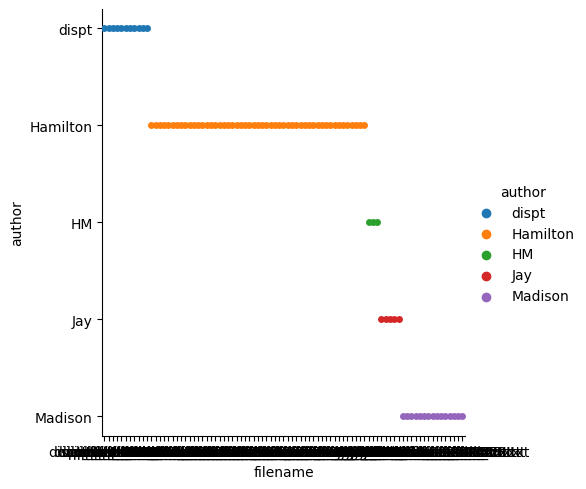

In [331]:
#scatter plot before
#scatterplot according to authors
sns.catplot(data=data, x="filename", y="author",hue='author', jitter=False)

In [332]:
#Minmax scaling

scaler = MinMaxScaler()
data_drop = data.drop(['author', 'filename'], axis=1).columns
data_minmax = scaler.fit_transform(data[data_drop])
data_minmax = pd.DataFrame(data_minmax, columns=data[data_drop].columns)
data_minmax

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
0,0.497297,0.330357,0.191489,0.511765,0.233444,0.228070,0.786667,0.422222,0.144068,0.841270,...,0.047619,0.157407,0.000000,0.123288,0.482051,0.341085,0.008982,0.487805,0.490617,0.0
1,0.218919,0.428571,0.276596,0.170588,0.291391,0.552632,0.253333,0.497778,0.966102,0.800454,...,0.269841,0.000000,0.000000,0.000000,0.169231,0.294574,0.248503,0.292683,0.348525,0.0
2,0.656757,0.669643,0.170213,0.123529,0.139073,0.070175,0.366667,0.782222,0.194915,0.984127,...,0.042328,0.138889,0.133333,0.000000,0.123077,0.062016,0.500000,0.146341,0.158177,0.0
3,0.470270,0.080357,0.340426,0.088235,0.074503,0.491228,0.340000,0.373333,0.474576,0.736961,...,0.460317,0.731481,0.133333,0.328767,0.441026,0.000000,0.218563,0.422764,0.147453,0.0
4,0.559459,0.348214,0.574468,0.147059,0.309603,0.350877,0.766667,0.537778,0.110169,0.689342,...,0.142857,0.185185,0.333333,0.095890,0.379487,0.209302,0.485030,0.382114,0.083110,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.108108,0.348214,0.297872,0.229412,0.339404,0.236842,0.233333,0.546667,0.228814,0.712018,...,0.105820,0.250000,0.116667,0.000000,0.179487,0.054264,0.634731,0.609756,0.176944,0.0
81,0.313514,0.116071,0.127660,0.241176,0.288079,0.289474,0.400000,0.400000,0.279661,0.820862,...,0.354497,0.101852,0.366667,0.000000,0.241026,0.217054,0.649701,0.552846,0.410188,0.0
82,0.218919,0.330357,1.000000,0.223529,0.362583,0.228070,0.813333,0.248889,0.305085,0.321995,...,0.111111,0.194444,0.166667,0.136986,0.169231,0.240310,0.029940,0.585366,0.032172,0.0
83,0.397297,0.678571,0.170213,0.441176,0.256623,0.070175,0.220000,0.488889,0.254237,0.442177,...,0.121693,0.212963,0.133333,0.000000,0.676923,0.294574,0.209581,0.276423,0.037534,0.0


In [333]:
#standard scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[data_drop])
data_scaled = pd.DataFrame(data_scaled, columns=data[data_drop].columns)
data_scaled

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
0,-0.173360,-0.035554,0.160448,0.937406,-0.233914,-0.689251,1.574714,-0.054503,-1.046624,1.276197,...,-0.582943,-0.155387,-1.109067,-0.208045,0.403042,0.463719,-1.367802,0.286642,1.216983,-0.210004
1,-1.522482,0.432658,0.638978,-1.031666,0.073596,0.944279,-0.761249,0.366654,2.676160,1.067074,...,0.871360,-0.974855,-1.109067,-0.891112,-1.022451,0.221158,-0.147191,-0.653470,0.502556,-0.210004
2,0.599439,1.581908,0.040816,-1.303263,-0.734716,-1.483941,-0.264857,1.952184,-0.816348,2.008127,...,-0.617570,-0.251795,-0.419071,-0.891112,-1.232769,-0.991646,1.134450,-1.358555,-0.454505,-0.210004
3,-0.304342,-1.227368,0.997875,-1.506960,-1.077370,0.635233,-0.381655,-0.327016,0.450166,0.741771,...,2.117905,2.833261,-0.419071,0.930399,0.216092,-1.315060,-0.299768,-0.026729,-0.508424,-0.210004
4,0.127901,0.049575,2.313832,-1.167464,0.170242,-0.071159,1.487115,0.589619,-1.200141,0.497795,...,0.040329,-0.010775,0.615923,-0.359838,-0.064333,-0.223536,1.058162,-0.222585,-0.831938,-0.210004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,-2.059512,0.049575,0.758610,-0.692171,0.328389,-0.645102,-0.848848,0.639167,-0.662832,0.613974,...,-0.202054,0.326653,-0.505321,-0.891112,-0.975713,-1.032073,1.821044,0.874212,-0.360147,-0.210004
81,-1.064043,-1.057109,-0.198449,-0.624272,0.056024,-0.380205,-0.118859,-0.178372,-0.432556,1.171635,...,1.425380,-0.444611,0.788422,-0.891112,-0.695289,-0.183110,1.897332,0.600013,0.812591,-0.210004
82,-1.522482,-0.035554,4.706481,-0.726121,0.451393,-0.689251,1.691512,-1.020685,-0.317419,-1.384312,...,-0.167428,0.037429,-0.246572,-0.132149,-1.022451,-0.061829,-1.260999,0.756698,-1.088053,-0.210004
83,-0.657996,1.624472,0.040816,0.530012,-0.110910,-1.483941,-0.907247,0.317106,-0.547694,-0.768561,...,-0.098176,0.133837,-0.419071,-0.891112,1.291054,0.221158,-0.345541,-0.731813,-1.061094,-0.210004


In [334]:
#only centering
data_centered = data[data_drop] - data[data_drop].mean(axis=0)
data_centered

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
0,-0.013235,-0.000835,0.001341,0.027612,-0.026624,-0.015612,0.053929,-0.0022,-0.027271,0.109847,...,-0.016835,-0.003224,-0.012859,-0.002741,0.017247,0.011471,-0.089647,0.007318,0.090282,-0.002024
1,-0.116235,0.010165,0.005341,-0.030388,0.008376,0.021388,-0.026071,0.0148,0.069729,0.091847,...,0.025165,-0.020224,-0.012859,-0.011741,-0.043753,0.005471,-0.009647,-0.016682,0.037282,-0.002024
2,0.045765,0.037165,0.000341,-0.038388,-0.083624,-0.033612,-0.009071,0.0788,-0.021271,0.172847,...,-0.017835,-0.005224,-0.004859,-0.011741,-0.052753,-0.024529,0.074353,-0.034682,-0.033718,-0.002024
3,-0.023235,-0.028835,0.008341,-0.044388,-0.122624,0.014388,-0.013071,-0.0132,0.011729,0.063847,...,0.061165,0.058776,-0.004859,0.012259,0.009247,-0.032529,-0.019647,-0.000682,-0.037718,-0.002024
4,0.009765,0.001165,0.019341,-0.034388,0.019376,-0.001612,0.050929,0.0238,-0.031271,0.042847,...,0.001165,-0.000224,0.007141,-0.004741,-0.002753,-0.005529,0.069353,-0.005682,-0.061718,-0.002024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,-0.157235,0.001165,0.006341,-0.020388,0.037376,-0.014612,-0.029071,0.0258,-0.017271,0.052847,...,-0.005835,0.006776,-0.005859,-0.011741,-0.041753,-0.025529,0.119353,0.022318,-0.026718,-0.002024
81,-0.081235,-0.024835,-0.001659,-0.018388,0.006376,-0.008612,-0.004071,-0.0072,-0.011271,0.100847,...,0.041165,-0.009224,0.009141,-0.011741,-0.029753,-0.004529,0.124353,0.015318,0.060282,-0.002024
82,-0.116235,-0.000835,0.039341,-0.021388,0.051376,-0.015612,0.057929,-0.0412,-0.008271,-0.119153,...,-0.004835,0.000776,-0.002859,-0.001741,-0.043753,-0.001529,-0.082647,0.019318,-0.080718,-0.002024
83,-0.050235,0.038165,0.000341,0.015612,-0.012624,-0.033612,-0.031071,0.0128,-0.014271,-0.066153,...,-0.002835,0.002776,-0.004859,-0.011741,0.055247,0.005471,-0.022647,-0.018682,-0.078718,-0.002024


In [335]:
print(data_minmax.mean())
print(data_scaled.mean())
print(data_centered.mean())

a        0.533068
all      0.337815
also     0.162954
an       0.349343
and      0.277522
           ...   
who      0.252166
will     0.277386
with     0.428312
would    0.248573
your     0.027345
Length: 70, dtype: float64
a       -4.375585e-16
all     -1.985340e-16
also     1.306145e-18
an       2.853926e-16
and     -4.284155e-16
             ...     
who     -3.265362e-16
will    -3.395976e-16
with    -4.777224e-16
would   -8.947091e-17
your    -1.371452e-17
Length: 70, dtype: float64
a       -3.363323e-17
all     -4.898043e-18
also    -1.938809e-19
an       7.918502e-18
and     -4.604160e-17
             ...     
who     -7.877685e-18
will    -2.253100e-17
with    -1.208184e-17
would   -6.857260e-18
your     2.755149e-19
Length: 70, dtype: float64


In [336]:
#convert to numpy arrays 
X= data_centered.to_numpy()
y=data['author'].to_numpy()


<AxesSubplot: >

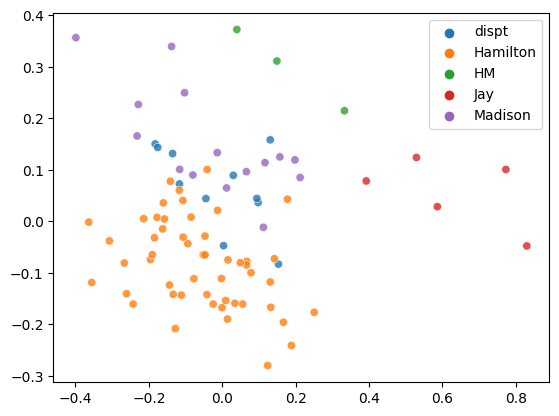

In [337]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,alpha=0.8)

In [338]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

In [339]:
y

array(['dispt', 'dispt', 'dispt', 'dispt', 'dispt', 'dispt', 'dispt',
       'dispt', 'dispt', 'dispt', 'dispt', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'HM', 'HM', 'HM',
       'Jay', 'Jay', 'Jay', 'Jay', 'Jay', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison',

In [340]:
y_pred

array([2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 3,
       3, 3, 3, 3, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2],
      dtype=int32)

In [341]:
kmeans.cluster_centers_

array([[ 0.03039944, -0.12231615],
       [ 0.12007135,  0.13405626],
       [-0.17834282,  0.04904443],
       [ 0.62229212,  0.05696138]])

In [342]:
kmeans.labels_

array([2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 3,
       3, 3, 3, 3, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2],
      dtype=int32)

In [343]:
#Predictions for disputed 11 papers:
y_pred[0:11,]

array([2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1], dtype=int32)

In [344]:
kmeans.transform(X_pca[0:10,])

array([[0.24437585, 0.24459901, 0.06603126, 0.73919568],
       [0.29817306, 0.02664513, 0.32793808, 0.50184911],
       [0.34613548, 0.30325516, 0.10146239, 0.81044035],
       [0.18271469, 0.18747157, 0.13389398, 0.66694377],
       [0.17262338, 0.09998374, 0.27652986, 0.5247837 ],
       [0.33657456, 0.29605561, 0.09466669, 0.80281707],
       [0.07989238, 0.21529153, 0.20579261, 0.62732951],
       [0.1788363 , 0.09300019, 0.27284595, 0.52796794],
       [0.30341045, 0.25540436, 0.09330217, 0.7613065 ],
       [0.12893051, 0.21938765, 0.35674383, 0.48954111]])

In [345]:
kmeans.inertia_

1.585330830589442

In [346]:
X_dist = kmeans.transform(X_pca)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

1.5853308305894416

In [347]:
kmeans.score(X_pca)

-1.585330830589442

In [348]:
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="full", random_state=5)

In [349]:
y_rnd_init1 = kmeans_rnd_init1.fit_predict(X_pca)
y_rnd_init2 = kmeans_rnd_init2.fit_predict(X_pca)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [350]:
np.allclose(y_rnd_init1, y_rnd_init2)

False

In [351]:
kmeans_rnd_init1.inertia_

1.6439496281395258

In [352]:
kmeans_rnd_init2.inertia_

1.6477619677618907

In [353]:
kmeans_rnd_10_inits = KMeans(n_clusters=k, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X_pca)

kmeans_rnd_10_inits.inertia_  ##better than 1 init

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


1.5845350302180852

In [354]:
#plot inertia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

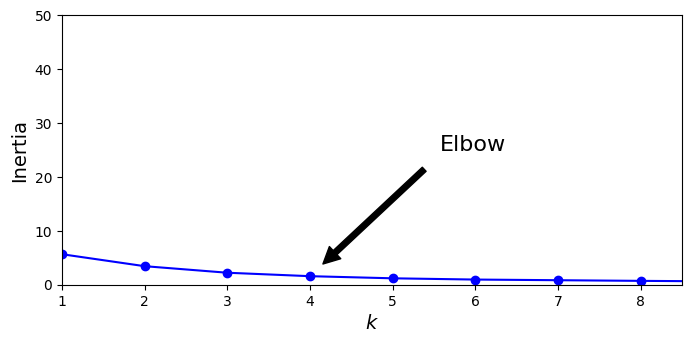

In [355]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 50])

plt.show()

In [356]:
#silhoutte
silhouette_score(X_pca, kmeans.labels_)

0.3797040846944318

In [357]:
silhouette_scores = [silhouette_score(X_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

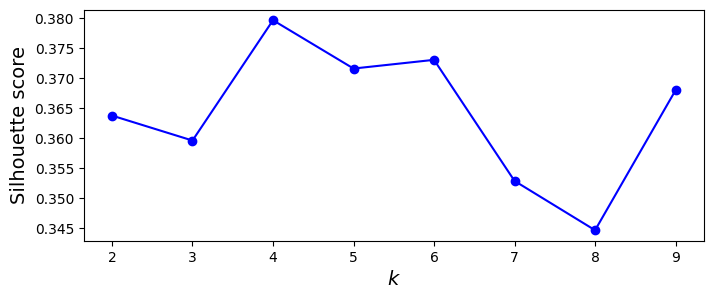

In [358]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

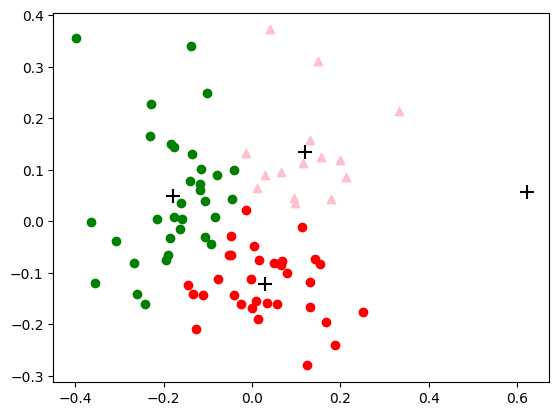

In [359]:
#visualise clusters, centroids, areas
#filter rows of original data
filtered_label0 = X_pca[y_pred == 0]
filtered_label1 = X_pca[y_pred == 1]
filtered_label2 = X_pca[y_pred == 2]

centroids = kmeans.cluster_centers_
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'pink',marker='^')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')

plt.scatter(centroids[:,0] , centroids[:,1] , s = 100,marker='+', color = 'black')
plt.show()


HAC Clustering


Text(0, 0.5, 'Average Cluster distance')

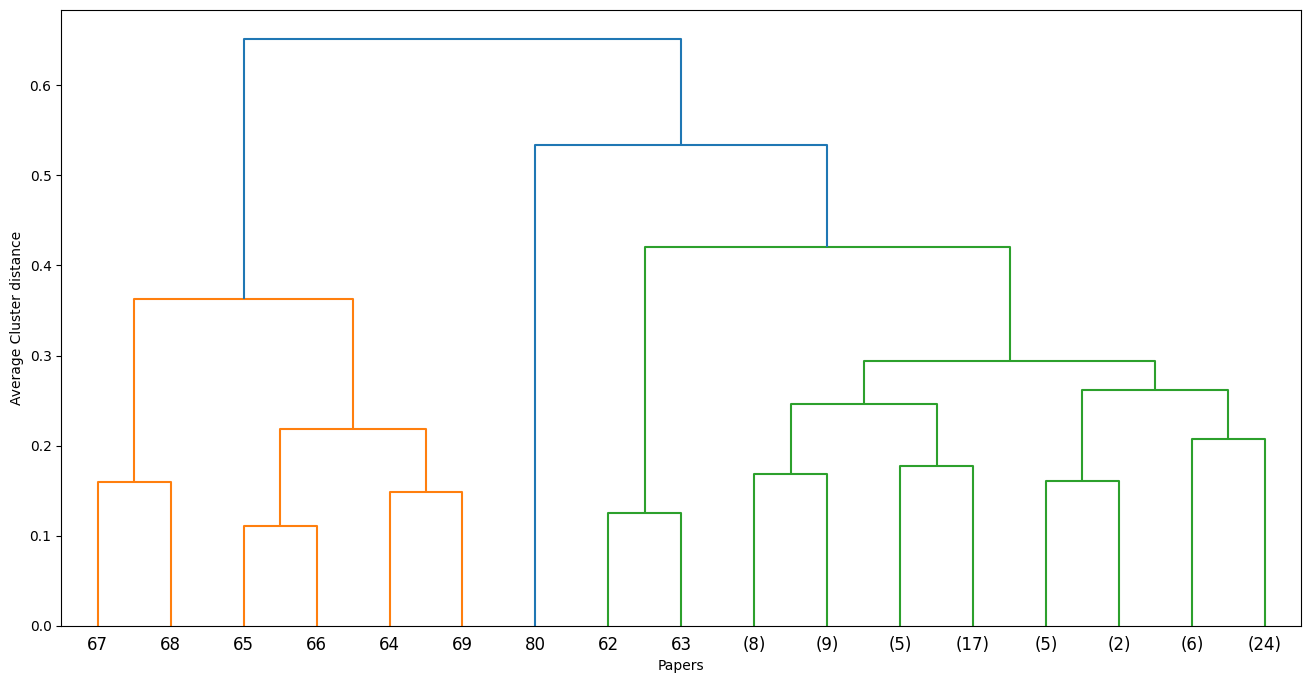

In [360]:
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
linkage_array = linkage(X_pca,method='average',metric='euclidean')
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters


plt.figure(figsize=(16, 8))

dendrogram(linkage_array,truncate_mode="level",p=5)
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

plt.xlabel("Papers")
plt.ylabel("Average Cluster distance")

In [361]:
model = AgglomerativeClustering(n_clusters=5)

model = model.fit(X_pca)

model.fit_predict(X_pca)

array([0, 4, 0, 2, 4, 0, 3, 4, 0, 3, 4, 3, 3, 3, 3, 3, 2, 4, 2, 3, 0, 3,
       3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 4, 2, 2, 2, 2, 0, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 0, 0, 1, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4])